12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

Prediction Results:
Average Actual Price: $220.76
Average Predicted Price: $225.89
Min Actual Price: $108.10
Max Actual Price: $309.32

Root Mean Square Error: $23.41
Mean Absolute Percentage Error: 9.05%


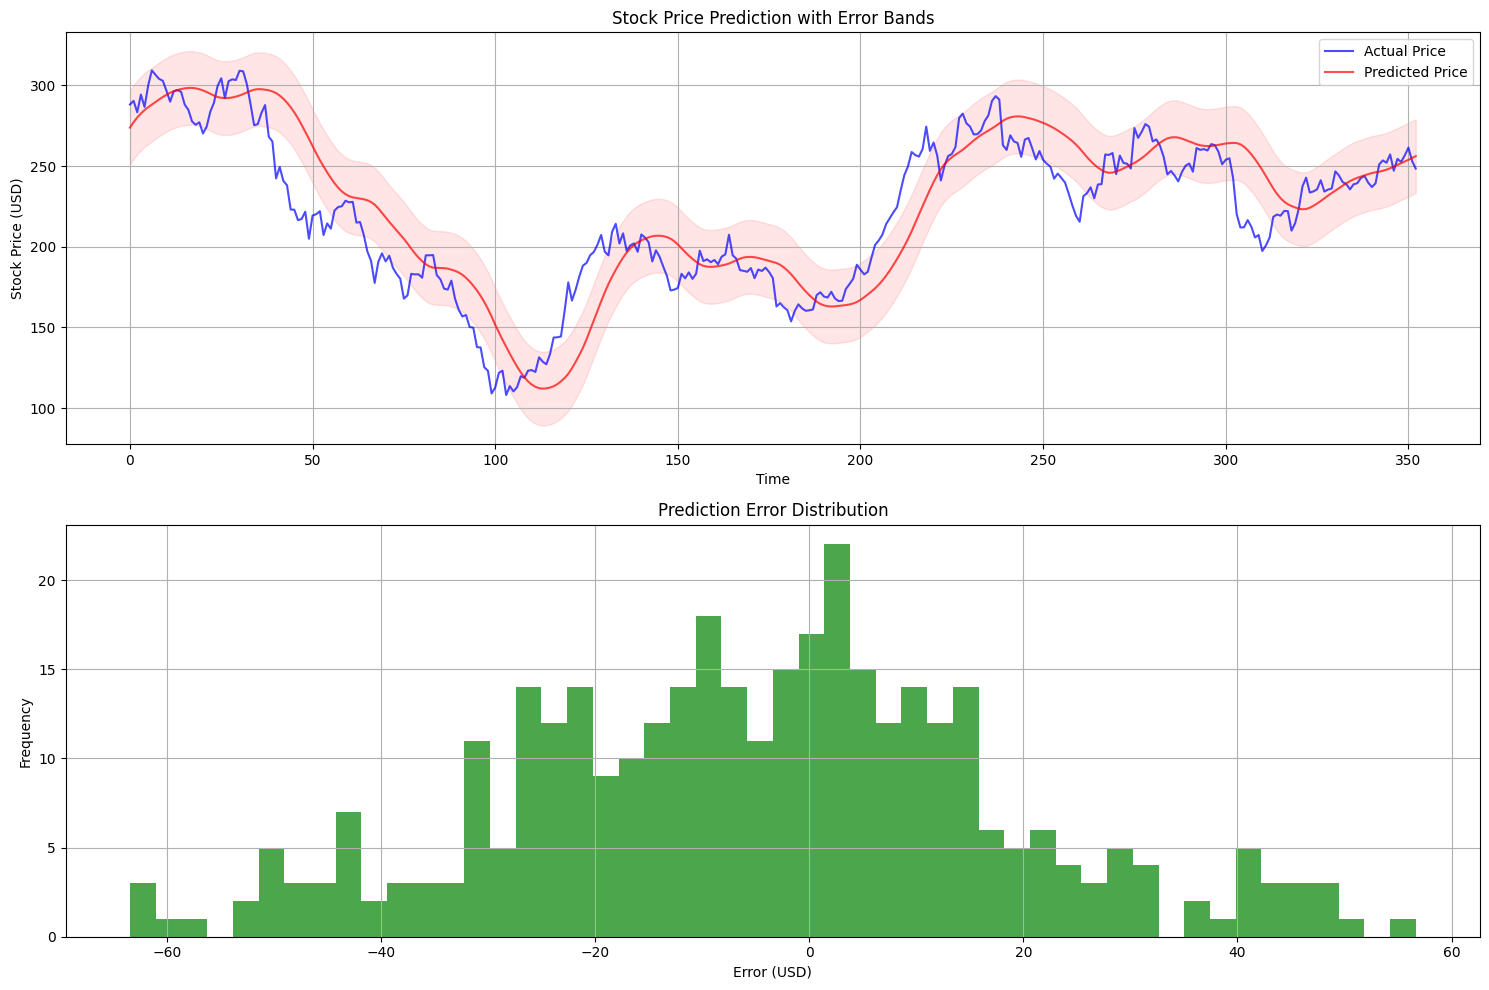


Detailed error analysis saved to 'prediction_results_v2.csv'


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd

try:
    # Load best model and data
    model = load_model('../models/best_model.h5')  # Load the best model saved during training
    X_test_seq = joblib.load("../processed_data/X_test_seq.pkl")
    y_test_seq = joblib.load("../processed_data/y_test_seq.pkl")
    close_scaler = joblib.load('../processed_data/close_scaler.pkl')

    # Make predictions
    predictions = model.predict(X_test_seq, batch_size=32)
    
    # Inverse transform predictions and actual values
    predicted_prices = close_scaler.inverse_transform(predictions)
    actual_prices = close_scaler.inverse_transform(y_test_seq.reshape(-1, 1))

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

    print("\nPrediction Results:")
    print(f"Average Actual Price: ${np.mean(actual_prices):.2f}")
    print(f"Average Predicted Price: ${np.mean(predicted_prices):.2f}")
    print(f"Min Actual Price: ${np.min(actual_prices):.2f}")
    print(f"Max Actual Price: ${np.max(actual_prices):.2f}")
    print(f"\nRoot Mean Square Error: ${rmse:.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%")

    # Plot results with error bands
    plt.figure(figsize=(15, 10))
    
    # Price predictions with confidence interval
    plt.subplot(2, 1, 1)
    plt.plot(actual_prices, label='Actual Price', color='blue', alpha=0.7)
    plt.plot(predicted_prices, label='Predicted Price', color='red', alpha=0.7)
    
    # Add error bands (standard deviation of errors)
    error_std = np.std(actual_prices - predicted_prices)
    plt.fill_between(range(len(predicted_prices)),
                    predicted_prices.flatten() - error_std,
                    predicted_prices.flatten() + error_std,
                    color='red', alpha=0.1)
    
    plt.title('Stock Price Prediction with Error Bands')
    plt.xlabel('Time')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    
    # Error distribution
    plt.subplot(2, 1, 2)
    errors = actual_prices - predicted_prices
    plt.hist(errors, bins=50, color='green', alpha=0.7)
    plt.title('Prediction Error Distribution')
    plt.xlabel('Error (USD)')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    # Save results to CSV
    results_df = pd.DataFrame({
        'Actual_Price': actual_prices.flatten(),
        'Predicted_Price': predicted_prices.flatten(),
        'Absolute_Error': abs(actual_prices.flatten() - predicted_prices.flatten()),
        'Percentage_Error': abs(actual_prices.flatten() - predicted_prices.flatten()) / actual_prices.flatten() * 100
    })
    results_df.to_csv('../results/prediction_results_v2.csv', index=False)
    
    print("\nDetailed error analysis saved to 'prediction_results_v2.csv'")

except Exception as e:
    print("\nError during prediction:")
    print(str(e))